In [1]:
"""
Численное решение ОДУ 2-го порядка экстраполяционным методом Адамса
"""


import sympy as sy
import numpy as np
import scipy as sc
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#начальные данные
#отрезок
a = 0
b = 1
#значение функции и первой производной в точке a
u0 = 0
u1_0 = 0

In [3]:
c1 = (1/6 + 61/18) / 3.5
c2 = 61/36 - c1
#аналитическое решение
u = lambda t: c1 * np.exp(-1.5 * t) + c2 * np.exp(2 * t) + 0.5 * t ** 2 + 1/6 * t - 61/36
#первая производная от аналитического решения
u1 = lambda t: t + c2 * 2 * np.exp(2 * t) + 1/6 + c1 * (-1.5) * np.exp(-1.5 * t)
#функция из правой части
f = lambda t: 1.5 * t**2 + t - 6
#поиск количества разбиений
Count = lambda h: math.ceil((b - a) / h) 

In [4]:
def U(t):
    return np.array([u(t), u1(t)])


#функция правой части
def F(t, Y):
    return np.array([Y[1], 0.5 * Y[1] + 3 * Y[0] - f(t)])

In [5]:
#экстраполяционный метода Адамса 4-го порядка, первые 4 члена находим по методу Рунге-Кутты 4-го порядка
def Adams(h):
    N = Count(h)
    T = np.arange(a, b + h, h)
    Solution = np.zeros((N+1, 2))
    Solution[0] = np.array([u0, u1_0])
    for i in range (0, 3):
        k1 = F(T[i], Solution[i])
        k2 = F(T[i] + h/2, Solution[i] + h * k1 / 2)
        k3 = F(T[i] + h/2, Solution[i] + h * k2 / 2)
        k4 = F(T[i] + h, Solution[i] + h * k3)
        Solution[i + 1] = Solution[i] + h * (k1 + 2*k2 + 2*k3 + k4) / 6
    for i in range(3, N):
        Solution[i+1] = Solution[i] + h * (55 * F(T[i], Solution[i]) - 59 * F(T[i-1], Solution[i-1]) + 
                                           37 * F(T[i-2], Solution[i-2]) - 9 * F(T[i-3], Solution[i-3]))/24
    return Solution


#массив погрешности
def fault(h):
    N = Count(h) + 1
    R = np.zeros(N)
    for i in range(N):
        R[i] = abs(Adams(h)[i][0] - Adams(h/2)[2*i][0]) / (2**4 - 1)
    return R


#достижение заданной точности
def accuracy(h, eps):
    R = max(fault(h))
    while R > eps:
        h1 = h/2
        R = max(fault(h1))
        h = h1
    return h

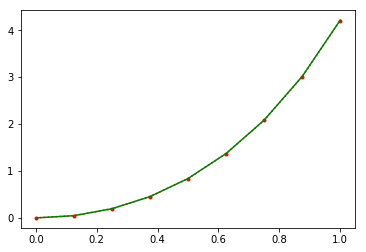

In [6]:
h = accuracy(0.25, 0.001)
T = np.arange(a, b + h, h)
A = Adams(h)[:, 0]
B = np.zeros(Count(h) + 1)
for i in range(Count(h) + 1):
    B[i] = U(T[i])[0]
  

plt.plot(T, A, '.:r');
plt.plot(T, B, 'g');

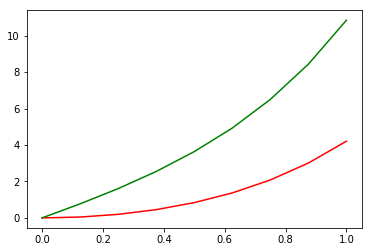

In [7]:
plt.plot(T, Adams(h)[:, 0], 'r');
plt.plot(T, Adams(h)[:, 1], 'g');

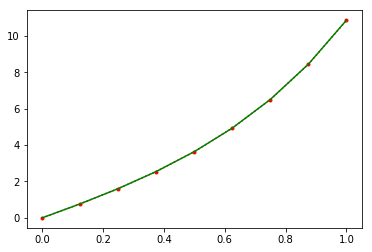

In [8]:
C = np.zeros(Count(h) + 1)
for i in range(Count(h) + 1):
    C[i] = U(T[i])[1]
plt.plot(T, Adams(h)[:, 1], '.:r');
plt.plot(T, C, 'g');

In [9]:
T

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ])